# EDA games dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%load_ext autoreload
%autoreload 2

import utils as ut

import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Reading the dataset

In [5]:
df_reviews = pd.read_csv('data/csv/reviews_clean.csv', encoding='utf-8')
df_games = pd.read_csv('data/csv/games_clean.csv', encoding='utf-8')
df_items = pd.read_csv('data/csv/uitems_clean.csv', encoding='utf-8')

# EDA Games table

In [6]:
df_games

,publisher,genres,item_name,price,early_access,item_id,developer,release_year
0,Kotoshiro,Action,Lost Summoner Kitty,4.99,False,761140,Kotoshiro,2018
1,Kotoshiro,Casual,Lost Summoner Kitty,4.99,False,761140,Kotoshiro,2018
2,Kotoshiro,Indie,Lost Summoner Kitty,4.99,False,761140,Kotoshiro,2018
3,Kotoshiro,Simulation,Lost Summoner Kitty,4.99,False,761140,Kotoshiro,2018
4,Kotoshiro,Strategy,Lost Summoner Kitty,4.99,False,761140,Kotoshiro,2018
...,...,...,...,...,...,...,...,...
84206,No data,Adventure,Maze Run VR,4.99,True,681550,No data,no data
84207,No data,Indie,Maze Run VR,4.99,True,681550,No data,no data
84208,No data,Action,Maze Run VR,4.99,True,681550,No data,no data
84209,No data,Simulation,Maze Run VR,4.99,True,681550,No data,no data


Initially, let's check the total number of games

In [7]:
total_games = len(df_games['item_name'].unique())
print(f"Total games: {total_games}")

Total games: 32019


Now, let's check the number of games per release year

In [8]:
# Count the number of games released per year and organize by quantity from highest to lowest
games_per_year = df_games['release_year'].value_counts().sort_values(ascending=False)[:15]

# Print result
print(games_per_year)

release_year
2017       25766
2016       18010
2015       12596
no data    10389
2014        6542
2013        3192
2012        2256
2011        1127
2010         794
2009         571
2018         503
2008         389
2007         322
2006         275
2005         175
Name: count, dtype: int64


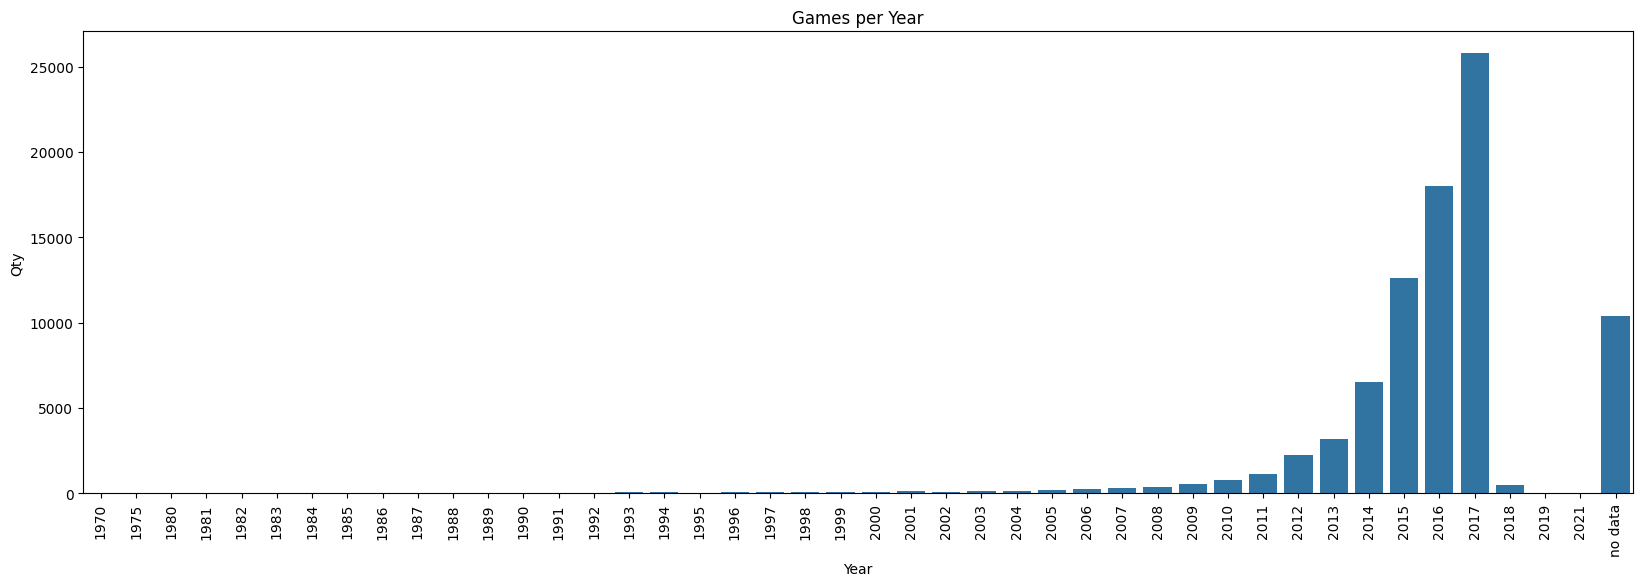

In [9]:
# Get years order
df_sorted = df_games.sort_values(by='release_year')

# Plot
plt.figure(figsize=(20, 6))
sns.countplot(data=df_sorted, x='release_year')
plt.xlabel('Year')
plt.ylabel('Qty')
plt.title('Games per Year')
plt.xticks(rotation=90)
plt.show()

Now, what about piblishers and developers?

In [10]:

# Filter the DataFrame by excluding 'no data' in the 'publisher' column
filtered_df = df_games[df_games['publisher'] != 'No data']

# Count the number of games per publisher
pub_qty = filtered_df['publisher'].value_counts()[:10]

# Filter the DataFrame by excluding 'no data' in the 'developer' column
filtered_df = df_games[df_games['developer'] != 'No data']

# Count the number of games per pev
dev_qty = filtered_df['developer'].value_counts()[:10]

#print 
print(f'Games per publisher', pub_qty)
print(f'Games per publisher', dev_qty)


Games per publisher publisher
SmiteWorks USA, LLC        2364
Ubisoft - San Francisco    2161
KISS ltd                    804
Ubisoft                     723
Degica                      541
SEGA                        466
Paradox Interactive         448
Big Fish Games              382
Ronimo Games                379
Dovetail Games - Trains     360
Name: count, dtype: int64
Games per publisher developer
Ubisoft - San Francisco       2516
SmiteWorks USA, LLC           2364
DL Softworks                   495
Ronimo Games                   379
Paradox Development Studio     311
Musopia                        285
Arcane Raise                   268
Dovetail Games                 256
Choice of Games                248
Boogygames Studios             236
Name: count, dtype: int64


Plot publisher and dev records

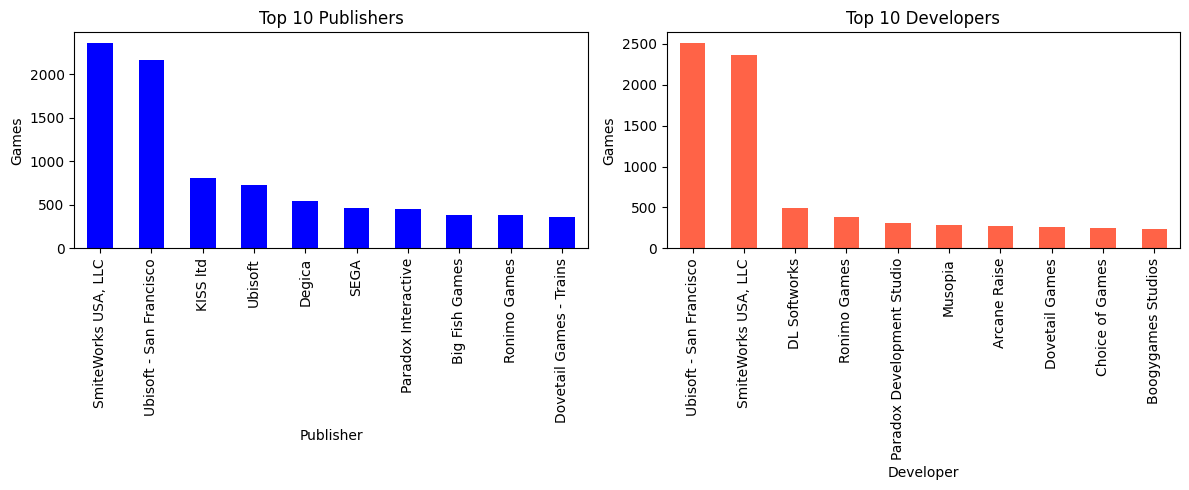

In [11]:
plt.figure(figsize=(12, 5))

# Publishers plot
plt.subplot(1, 2, 1)
pub_qty.plot(kind='bar', color='blue')
plt.xlabel('Publisher') ; plt.ylabel('Games') ; plt.title('Top 10 Publishers')

# Dev plot
plt.subplot(1, 2, 2)
dev_qty.plot(kind='bar', color='tomato')
plt.xlabel('Developer') ; plt.ylabel('Games') ; plt.title('Top 10 Developers')

# show plot
plt.tight_layout()
plt.show()

How many games have early access?

In [12]:
# Count the number of records for each unique value in 'early_access'
early_access_counts = df_games['early_access'].value_counts()
early_access_counts

early_access
False    75444
True      8767
Name: count, dtype: int64

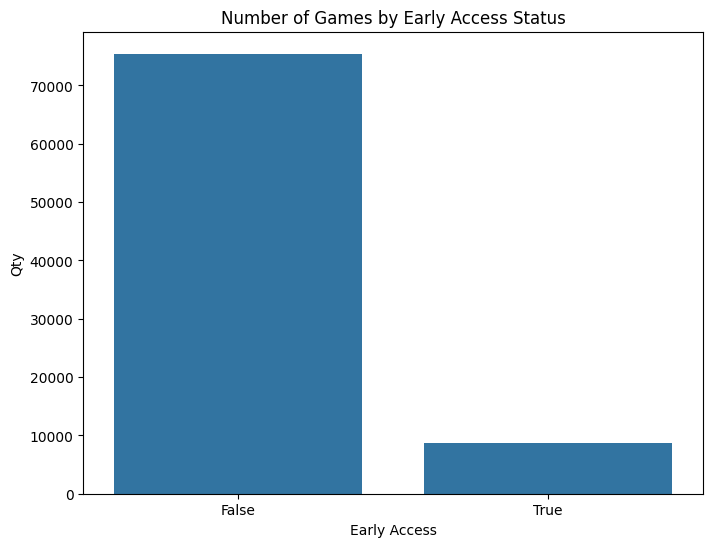

In [13]:
# Graph the number of records for each unique value
plt.figure(figsize=(8, 6))
sns.countplot(data=df_games, x='early_access')
plt.xlabel('Early Access')
plt.ylabel('Qty')
plt.title('Number of Games by Early Access Status')
plt.show()

We must to analize genres and games. I think They have a good information for our models

In [14]:
df_genre = df_games[df_games['genres'] != 'No data']

In [15]:
genre_counts = df_genre['genres'].value_counts()[:10]
print(genre_counts)

genres
Indie           17124
Action          12420
Casual           9148
Adventure        8846
Simulation       7373
Strategy         7159
RPG              5606
Free to Play     2211
Early Access     1943
VR               1712
Name: count, dtype: int64


Text(0.5, 1.0, 'Top 10 de Genres per Qty')

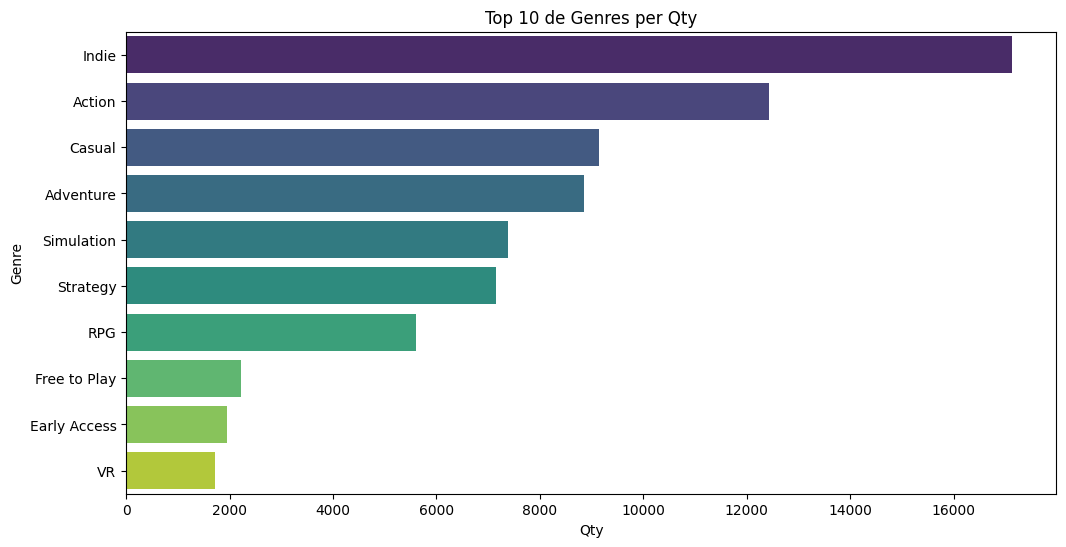

In [16]:
# Get the top 10 genres by quantity
top10_genres = df_genre['genres'].value_counts().head(10)

# Graph in a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top10_genres.values, y=top10_genres.index, palette='viridis')

plt.xlabel('Qty')
plt.ylabel('Genre')
plt.title('Top 10 de Genres per Qty')


# EDA items table

In [17]:
df_items

,item_id,item_name,playtime_forever,user_id,items_count,steam_id,user_url
0,10,Counter-Strike,6,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
1,20,Team Fortress Classic,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
2,30,Day of Defeat,7,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
3,40,Deathmatch Classic,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
4,50,Half-Life: Opposing Force,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
...,...,...,...,...,...,...,...
5094100,346330,BrainBread 2,0,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...
5094101,373330,All Is Dust,0,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...
5094102,388490,One Way To Die: Steam Edition,3,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...
5094103,521570,You Have 10 Seconds 2,4,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...


For our model, we only have 2 variables to analize in df_items table 

In [19]:
items_count_user = df_items.groupby('user_id')['items_count'].unique().explode()

In [20]:
items_count_user

user_id
--000--               58
--ace--               44
--ionex--             23
-2SV-vuLB-Kg          68
-404PageNotFound-    149
                    ... 
zzonci                 5
zzoptimuszz           61
zzydrax               13
zzyfo                 84
zzzmidmiss            69
Name: items_count, Length: 70912, dtype: object

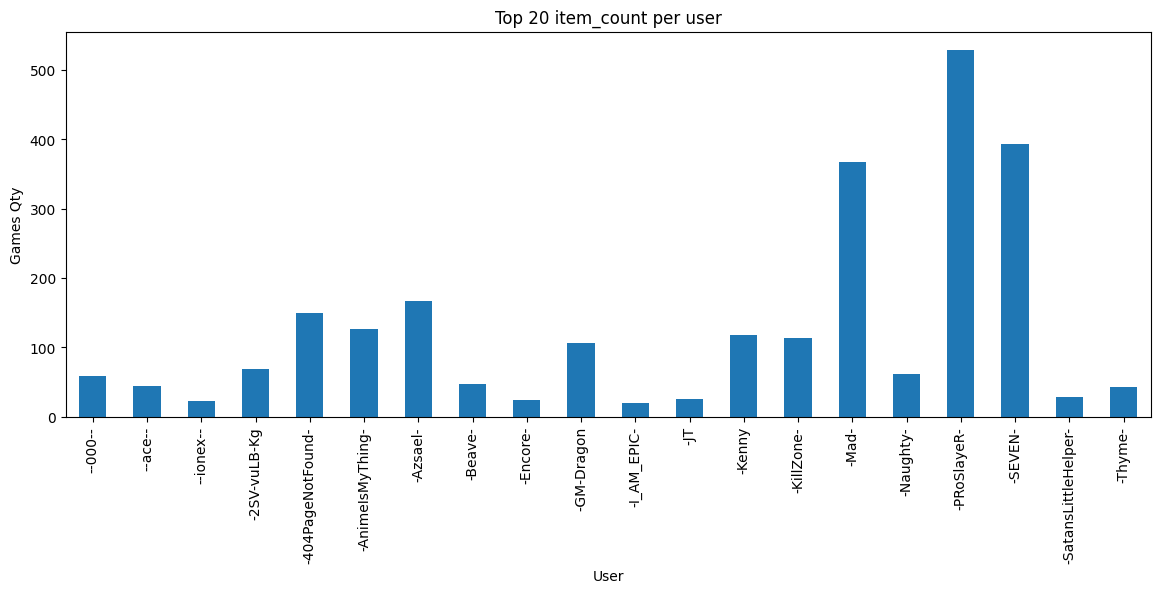

In [22]:
# Item qty per user plot
plt.figure(figsize=(14, 5))
items_count_user[:20].plot(kind='bar')
plt.xlabel('User') ; plt.ylabel('Games Qty') ; plt.title('Top 20 item_count per user')
plt.show()

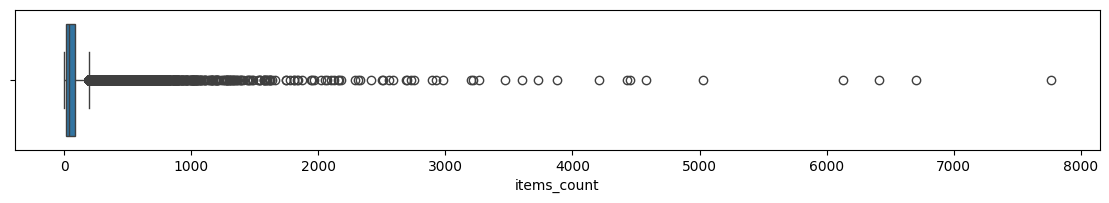

In [29]:
items_count_user = pd.DataFrame(items_count_user)
items_count_user_o = items_count_user.sort_values('items_count', ascending=False)

fig = plt.figure(figsize=(14, 4))


ax1 = fig.add_subplot(212, sharex=ax1)
sns.boxplot(data=items_count_user_o, x='items_count', ax=ax1)
ax1.set_xlabel('items_count')

plt.show()

# Model Variables
Now, we going to select variables for our ML models.

Model 1: 
The model must have an item-item relationship, that is, an item is taken, based on how similar that item is to the rest, similar ones are recommended.
Our items are games, so we will relate them by genre 

Model 2:
The recommendation system must apply the user-item filter, that is, take a user, find similar users, and recommend items that those similar users liked. We will then take the relationship between users, their recommendations and the games played by users with similar characteristics.

Finally, we going to join the models tables in only one model table to load in our ceromendations models file

In [30]:
df_games

,publisher,genres,item_name,price,early_access,item_id,developer,release_year
0,Kotoshiro,Action,Lost Summoner Kitty,4.99,False,761140,Kotoshiro,2018
1,Kotoshiro,Casual,Lost Summoner Kitty,4.99,False,761140,Kotoshiro,2018
2,Kotoshiro,Indie,Lost Summoner Kitty,4.99,False,761140,Kotoshiro,2018
3,Kotoshiro,Simulation,Lost Summoner Kitty,4.99,False,761140,Kotoshiro,2018
4,Kotoshiro,Strategy,Lost Summoner Kitty,4.99,False,761140,Kotoshiro,2018
...,...,...,...,...,...,...,...,...
84206,No data,Adventure,Maze Run VR,4.99,True,681550,No data,no data
84207,No data,Indie,Maze Run VR,4.99,True,681550,No data,no data
84208,No data,Action,Maze Run VR,4.99,True,681550,No data,no data
84209,No data,Simulation,Maze Run VR,4.99,True,681550,No data,no data


Model 1 variables

In [32]:

df_model1 = df_games[['item_id', 'item_name', 'genres']]

In [33]:
df_model1

,item_id,item_name,genres
0,761140,Lost Summoner Kitty,Action
1,761140,Lost Summoner Kitty,Casual
2,761140,Lost Summoner Kitty,Indie
3,761140,Lost Summoner Kitty,Simulation
4,761140,Lost Summoner Kitty,Strategy
...,...,...,...
84206,681550,Maze Run VR,Adventure
84207,681550,Maze Run VR,Indie
84208,681550,Maze Run VR,Action
84209,681550,Maze Run VR,Simulation


In [34]:
df_model1.drop_duplicates(inplace=True)

In [35]:
df_model1

,item_id,item_name,genres
0,761140,Lost Summoner Kitty,Action
1,761140,Lost Summoner Kitty,Casual
2,761140,Lost Summoner Kitty,Indie
3,761140,Lost Summoner Kitty,Simulation
4,761140,Lost Summoner Kitty,Strategy
...,...,...,...
84206,681550,Maze Run VR,Adventure
84207,681550,Maze Run VR,Indie
84208,681550,Maze Run VR,Action
84209,681550,Maze Run VR,Simulation


In [36]:
ut.data_summ(df_model1)


Total rows:  84200

Total full null rows:  0


,Column,Data_type,No_miss_Qty,%Missing,Missing_Qty
0,item_id,[<class 'int'>],84200,0.0,0
1,item_name,[<class 'str'>],84200,0.0,0
2,genres,[<class 'str'>],84200,0.0,0


In [ ]:
def summary(df_model1):
    print(f'data shape: {df_model1.shape}')
    summ = pd.DataFrame(df_model1.dtypes, columns=['data type'])
    summ['#missing'] = df_model1.isnull().sum()
    summ['%missing'] = df_model1.isnull().sum()*100/len(df_model1)
    summ['#unique'] = df_model1.nunique()
    desc = pd.DataFrame(df_model1.describe(include='all').T)
    summ['min'] = desc['min']
    summ['max'] = desc['max']
    return summ

summary(df_model1)

data shape: (84200, 3)


,data type,#missing,%missing,#unique,min,max
item_id,int64,0,0.0,32019,10.0,2028850.0
item_name,object,0,0.0,32019,NaN,NaN
genres,object,0,0.0,257,NaN,NaN


Model 2 Variables

In [37]:
df_auxr = df_reviews[['user_id', 'recommend', 'sentiment_analysis']]
df_auxi = df_items[['item_id', 'item_name', 'user_id']]

In [38]:
df_model2 = df_auxi.merge(df_auxr, on='user_id', how='inner')
df_model2

,item_id,item_name,user_id,recommend,sentiment_analysis
0,10,Counter-Strike,76561197970982479,True,2
1,10,Counter-Strike,76561197970982479,True,2
2,10,Counter-Strike,76561197970982479,True,2
3,20,Team Fortress Classic,76561197970982479,True,2
4,20,Team Fortress Classic,76561197970982479,True,2
...,...,...,...,...,...
6211290,311210,Call of Duty: Black Ops III,ApxLGhost,True,2
6211291,203290,America's Army: Proving Grounds,76561198267374962,True,2
6211292,290140,Echo of Soul,76561198267374962,True,2
6211293,730,Counter-Strike: Global Offensive,76561198267374962,True,2


In [39]:
df_model2.drop_duplicates(inplace=True)

In [40]:
df_model2

,item_id,item_name,user_id,recommend,sentiment_analysis
0,10,Counter-Strike,76561197970982479,True,2
3,20,Team Fortress Classic,76561197970982479,True,2
6,30,Day of Defeat,76561197970982479,True,2
9,40,Deathmatch Classic,76561197970982479,True,2
12,50,Half-Life: Opposing Force,76561197970982479,True,2
...,...,...,...,...,...
6211290,311210,Call of Duty: Black Ops III,ApxLGhost,True,2
6211291,203290,America's Army: Proving Grounds,76561198267374962,True,2
6211292,290140,Echo of Soul,76561198267374962,True,2
6211293,730,Counter-Strike: Global Offensive,76561198267374962,True,2


In [41]:
row = df_model2[df_model2['item_name'] == 'Counter-Strike']
row

,item_id,item_name,user_id,recommend,sentiment_analysis
0,10,Counter-Strike,76561197970982479,True,2
831,10,Counter-Strike,js41637,True,2
832,10,Counter-Strike,js41637,True,0
4210,10,Counter-Strike,doctr,True,2
4214,10,Counter-Strike,doctr,True,0
...,...,...,...,...,...
6209199,10,Counter-Strike,K1NGCJS,True,2
6209201,10,Counter-Strike,K1NGCJS,True,1
6210229,10,Counter-Strike,celebrexISGO,True,2
6210245,10,Counter-Strike,76561198208507532,True,0


In [42]:
df_model2

,item_id,item_name,user_id,recommend,sentiment_analysis
0,10,Counter-Strike,76561197970982479,True,2
3,20,Team Fortress Classic,76561197970982479,True,2
6,30,Day of Defeat,76561197970982479,True,2
9,40,Deathmatch Classic,76561197970982479,True,2
12,50,Half-Life: Opposing Force,76561197970982479,True,2
...,...,...,...,...,...
6211290,311210,Call of Duty: Black Ops III,ApxLGhost,True,2
6211291,203290,America's Army: Proving Grounds,76561198267374962,True,2
6211292,290140,Echo of Soul,76561198267374962,True,2
6211293,730,Counter-Strike: Global Offensive,76561198267374962,True,2


In [43]:
df_model2 = df_model2.drop_duplicates(subset=['item_id', 'user_id'], keep= 'first')


In [44]:
df_model2

,item_id,item_name,user_id,recommend,sentiment_analysis
0,10,Counter-Strike,76561197970982479,True,2
3,20,Team Fortress Classic,76561197970982479,True,2
6,30,Day of Defeat,76561197970982479,True,2
9,40,Deathmatch Classic,76561197970982479,True,2
12,50,Half-Life: Opposing Force,76561197970982479,True,2
...,...,...,...,...,...
6211290,311210,Call of Duty: Black Ops III,ApxLGhost,True,2
6211291,203290,America's Army: Proving Grounds,76561198267374962,True,2
6211292,290140,Echo of Soul,76561198267374962,True,2
6211293,730,Counter-Strike: Global Offensive,76561198267374962,True,2


We are going to create a new column called 'Rating' where we will classify the games according to the recommendation given by the users and the sentiment analysis given to the respective game

In [45]:
def rating_def(row):
    '''
    Calculates a rating based on sentiment analysis and game review recommendations made by users.

    Parameters:
    row (dict): A dictionary containing the following keys:
        - "sentiment_analysis" (int): The sentiment analysis score (0, 1 or 2).
        - "recommend" (bool): Indicates whether the reviews recommend.

    Return:
        int or None: The rating calculated as an integer between 1 and 5, or None if the inputs are invalid.
    '''
    if row["sentiment_analysis"] == 0 and not row["recommend"]:
        return 1
    elif row["sentiment_analysis"] == 0 and row["recommend"]:
        return 1
    elif row["sentiment_analysis"] == 1 and not row["recommend"]:
        return 2
    elif row["sentiment_analysis"] == 1 and row["recommend"]:
        return 3
    elif row["sentiment_analysis"] == 2 and not row["recommend"]:
        return 4
    elif row["sentiment_analysis"] == 2 and row["recommend"]:
        return 5
    else:
        return None

In [46]:
df_model2['rating'] = df_model2.apply(rating_def, axis=1)
df_model2.drop(columns=['recommend', 'sentiment_analysis'], inplace=True)
df_model2

,item_id,item_name,user_id,rating
0,10,Counter-Strike,76561197970982479,5
3,20,Team Fortress Classic,76561197970982479,5
6,30,Day of Defeat,76561197970982479,5
9,40,Deathmatch Classic,76561197970982479,5
12,50,Half-Life: Opposing Force,76561197970982479,5
...,...,...,...,...
6211290,311210,Call of Duty: Black Ops III,ApxLGhost,5
6211291,203290,America's Army: Proving Grounds,76561198267374962,5
6211292,290140,Echo of Soul,76561198267374962,5
6211293,730,Counter-Strike: Global Offensive,76561198267374962,5


Join Model 1 and model 2 variables

In [47]:
model = df_model1.merge(df_model2, on='item_name', how='inner')
model

,item_id_x,item_name,genres,item_id_y,user_id,rating
0,282010,Carmageddon Max Pack,Action,282010,UTNerd24,1
1,282010,Carmageddon Max Pack,Action,282010,I_DID_911_JUST_SAYING,1
2,282010,Carmageddon Max Pack,Action,282010,saint556,1
3,282010,Carmageddon Max Pack,Action,282010,chidvd,5
4,282010,Carmageddon Max Pack,Action,282010,aerpub,1
...,...,...,...,...,...,...
4340872,80,Counter-Strike: Condition Zero,Action,80,lachwe,5
4340873,80,Counter-Strike: Condition Zero,Action,80,danebuchanan,5
4340874,80,Counter-Strike: Condition Zero,Action,80,K1NGCJS,1
4340875,80,Counter-Strike: Condition Zero,Action,80,celebrexISGO,5


In [48]:
model.drop('item_id_y', axis=1, inplace=True)
model.rename(columns={'item_id_x': 'item_id'}, inplace=True)
model.drop_duplicates(inplace=True)
model

,item_id,item_name,genres,user_id,rating
0,282010,Carmageddon Max Pack,Action,UTNerd24,1
1,282010,Carmageddon Max Pack,Action,I_DID_911_JUST_SAYING,1
2,282010,Carmageddon Max Pack,Action,saint556,1
3,282010,Carmageddon Max Pack,Action,chidvd,5
4,282010,Carmageddon Max Pack,Action,aerpub,1
...,...,...,...,...,...
4340872,80,Counter-Strike: Condition Zero,Action,lachwe,5
4340873,80,Counter-Strike: Condition Zero,Action,danebuchanan,5
4340874,80,Counter-Strike: Condition Zero,Action,K1NGCJS,1
4340875,80,Counter-Strike: Condition Zero,Action,celebrexISGO,5


In [50]:
ut.data_summ(model)


Total rows:  4335484

Total full null rows:  0


,Column,Data_type,No_miss_Qty,%Missing,Missing_Qty
0,item_id,[<class 'int'>],4335484,0.0,0
1,item_name,[<class 'str'>],4335484,0.0,0
2,genres,[<class 'str'>],4335484,0.0,0
3,user_id,[<class 'str'>],4335484,0.0,0
4,rating,[<class 'int'>],4335484,0.0,0


In [51]:
dfs = [model]
# Nombres correspondientes a cada DataFrame
names = ['model']

ut.save_to_csv(dfs, names)

DataFrame 'model' saved as 'data/csv/model.csv'
